[*********************100%***********************]  3 of 3 completed
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')  # Ensure no remaining NaNs


Data Loaded
Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Summary Statistics:
 Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      70.089251   310.253154   111.438965
std        4.889919   111.250656   110.120450
min       62.637577   157.328552     9.578000
25%       66.314075   214.822327    17.066167
50%       68.888950   275.812286    25.043000
75%       73.807495   402.297470   216.865002
max       79.812927   584.590027   409.970001


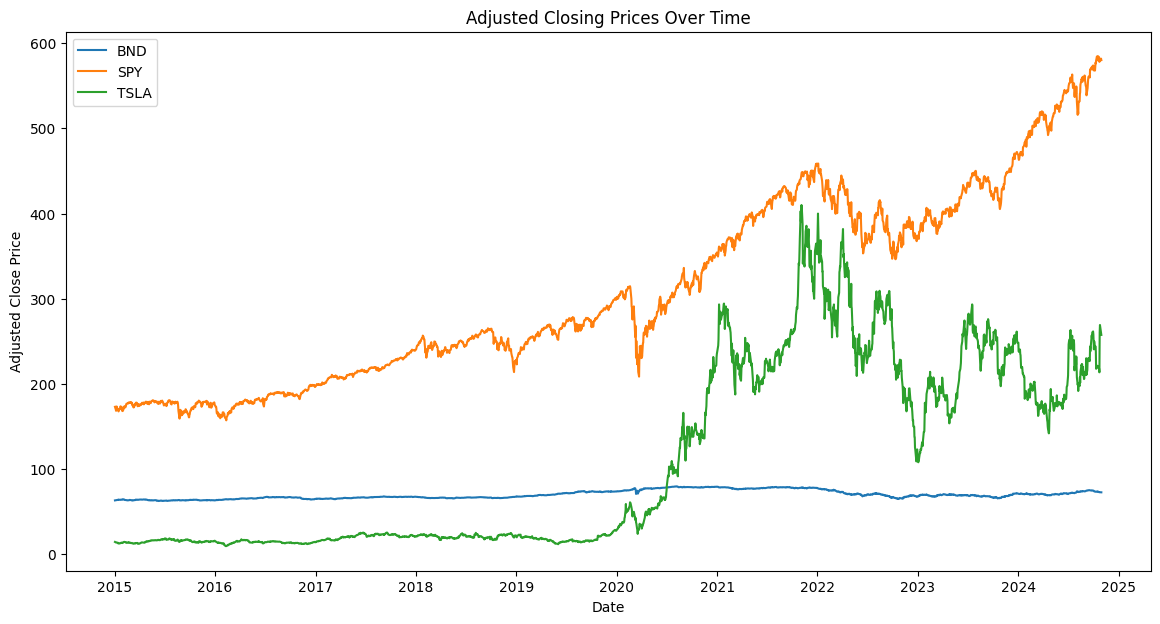

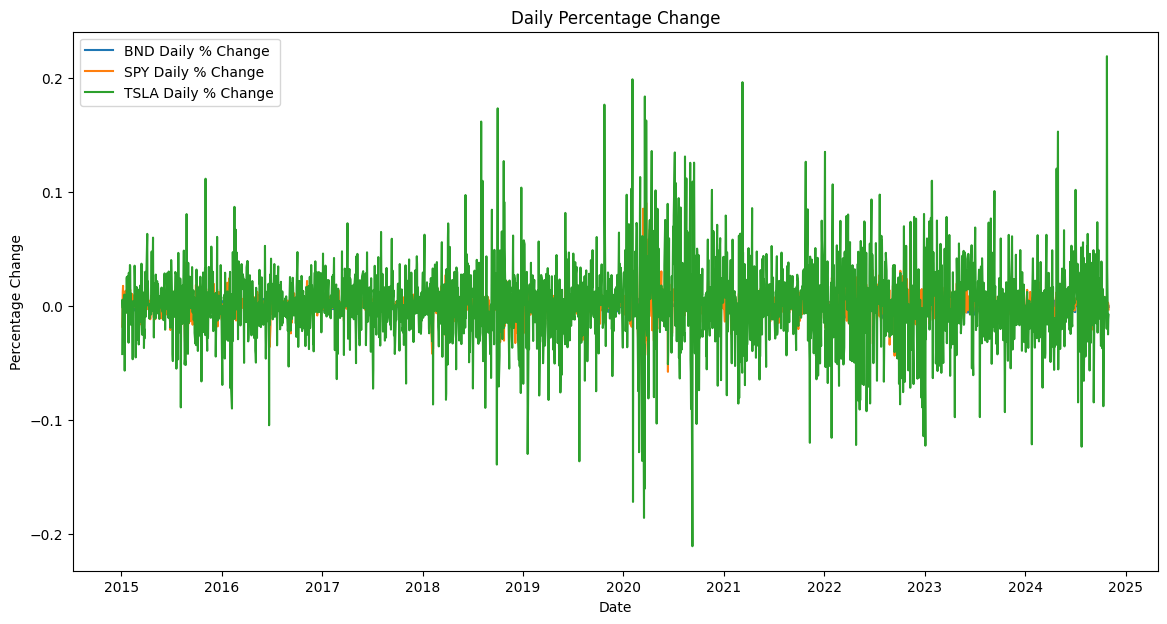

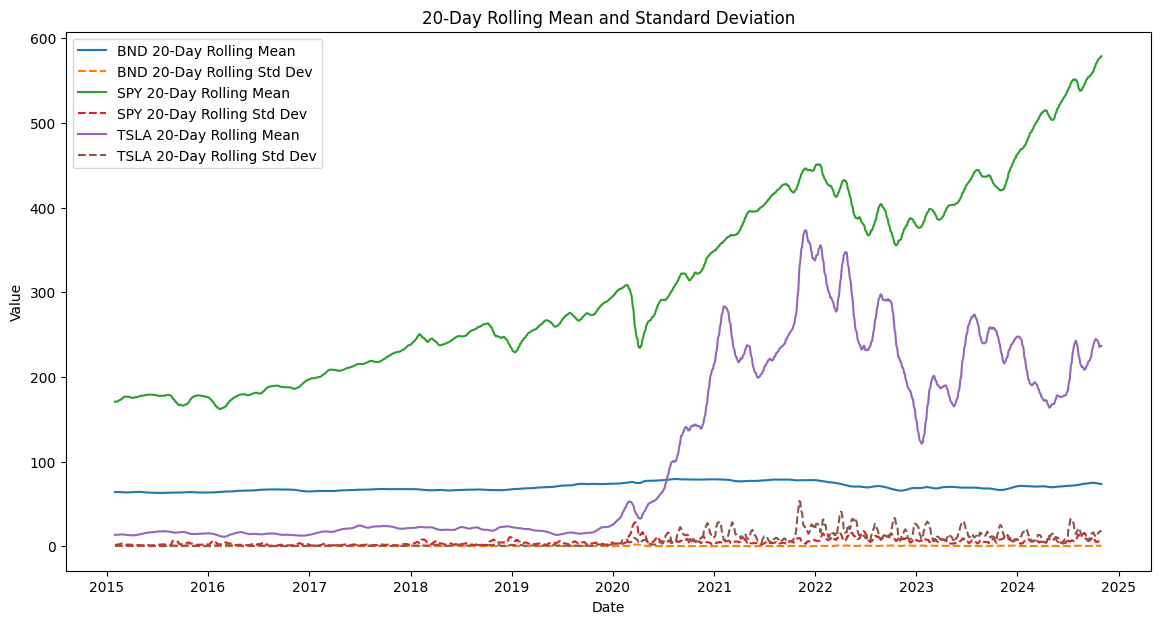

Outliers:
       BND  SPY     TSLA
0     NaN  NaN      NaN
1     NaN  NaN      NaN
2     NaN  NaN      NaN
3     NaN  NaN      NaN
4     NaN  NaN      NaN
...   ...  ...      ...
2468  NaN  NaN  0.21919
2469  NaN  NaN      NaN
2470  NaN  NaN      NaN
2471  NaN  NaN      NaN
2472  NaN  NaN      NaN

[2473 rows x 3 columns]


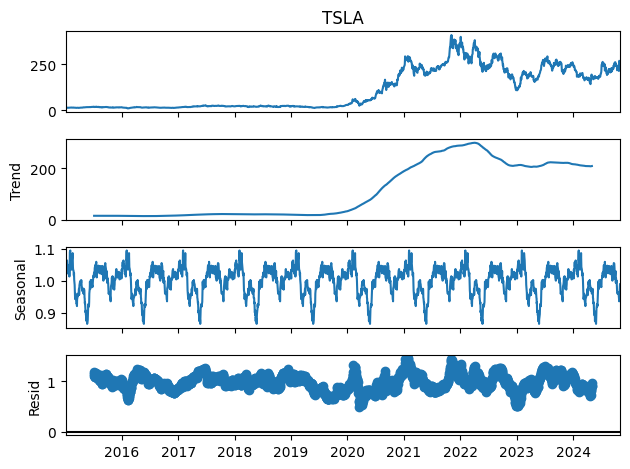

Value at Risk (5% confidence):
 Ticker
BND    -0.004798
SPY    -0.016764
TSLA   -0.051257
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
BND    -0.004994
SPY     0.042373
TSLA    0.048033
dtype: float64


In [2]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Step 1: Load data
data = load_data(tickers, start_date, end_date)
print("Data Loaded")

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)


In [2]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")


[*********************100%***********************]  3 of 3 completed

Data saved as cleaned_financial_data.csv



C:\Users\Naim\AppData\Local\Temp\ipykernel_23016\1069630514.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


C:\Users\Naim\AppData\Local\Temp\ipykernel_16912\152412324.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.asfreq('D').fillna(method='ffill')  # forward fill
C:\Users\Naim\AppData\Local\Temp\ipykernel_16912\152412324.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data = bnd_data.asfreq('D').fillna(method='ffill')
C:\Users\Naim\AppData\Local\Temp\ipykernel_16912\152412324.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data = spy_data.asfreq('D').fillna(method='ffill')


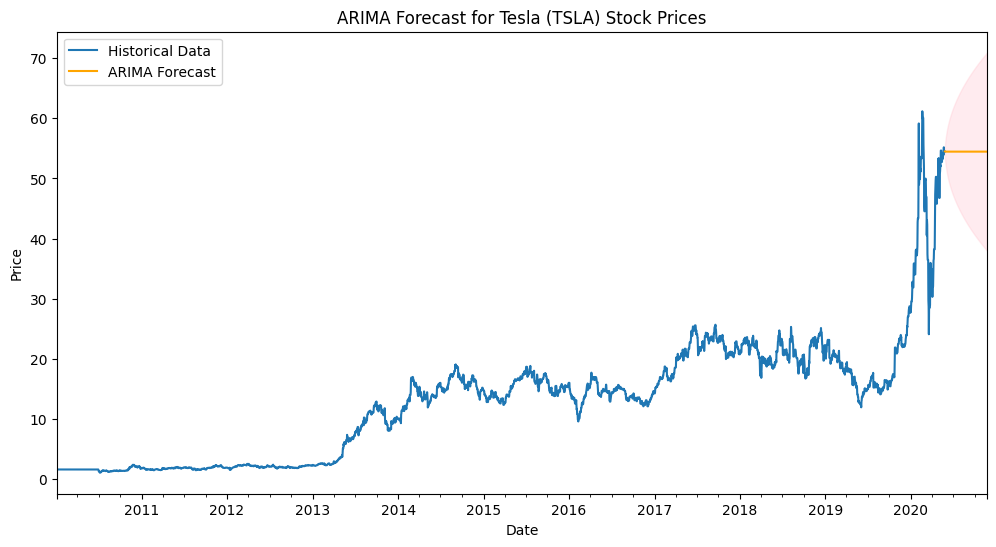

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"


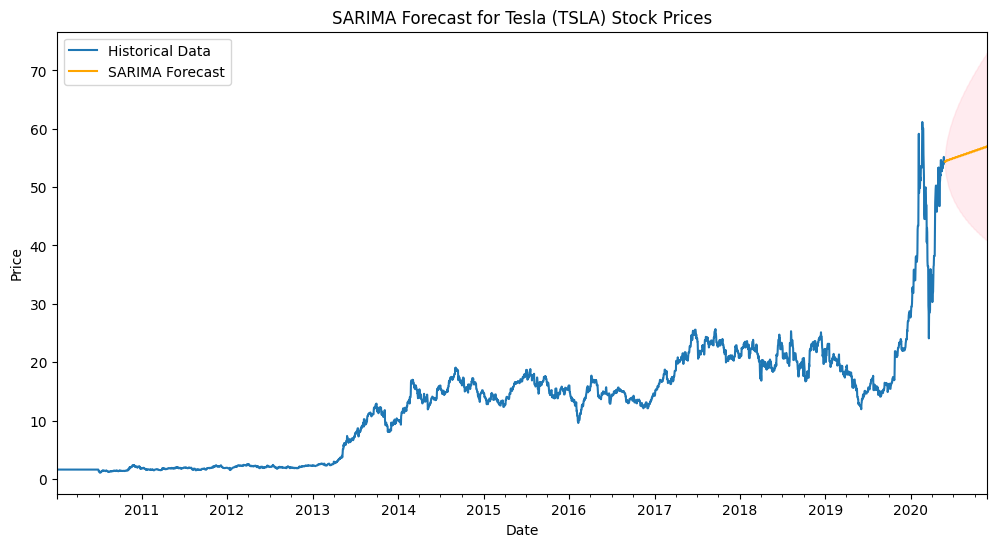

Trend Analysis:
The trend over the forecast period is upward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0056
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 5.0997e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.1598e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 4.1938e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.0452e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.1674e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.0491e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.8049e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.6611e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.3449e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━

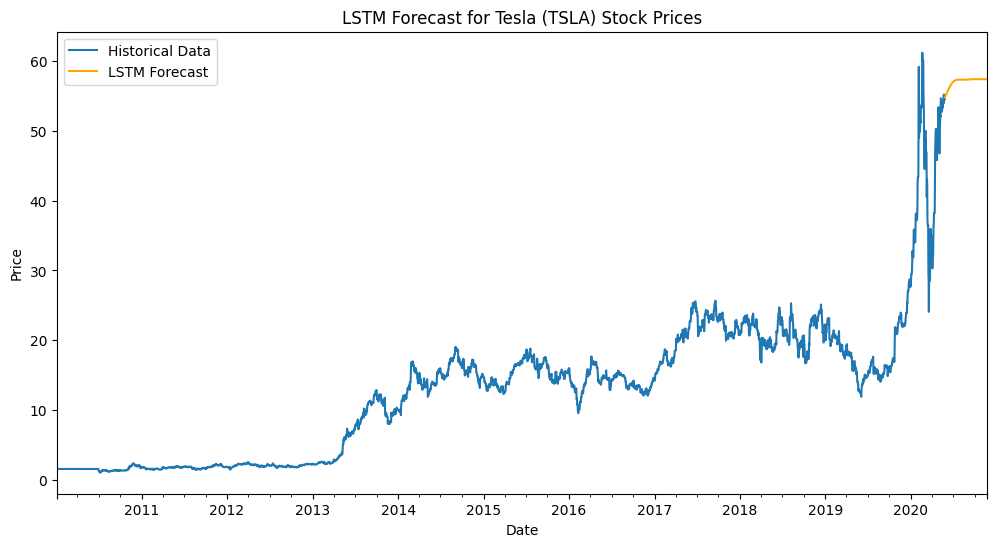

Trend Analysis:
The trend over the forecast period is upward.

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


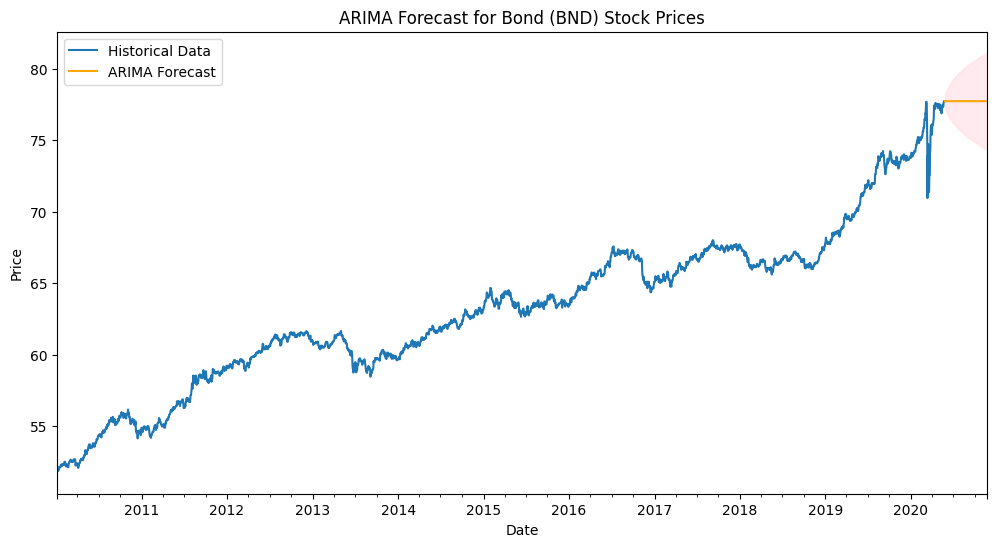

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\

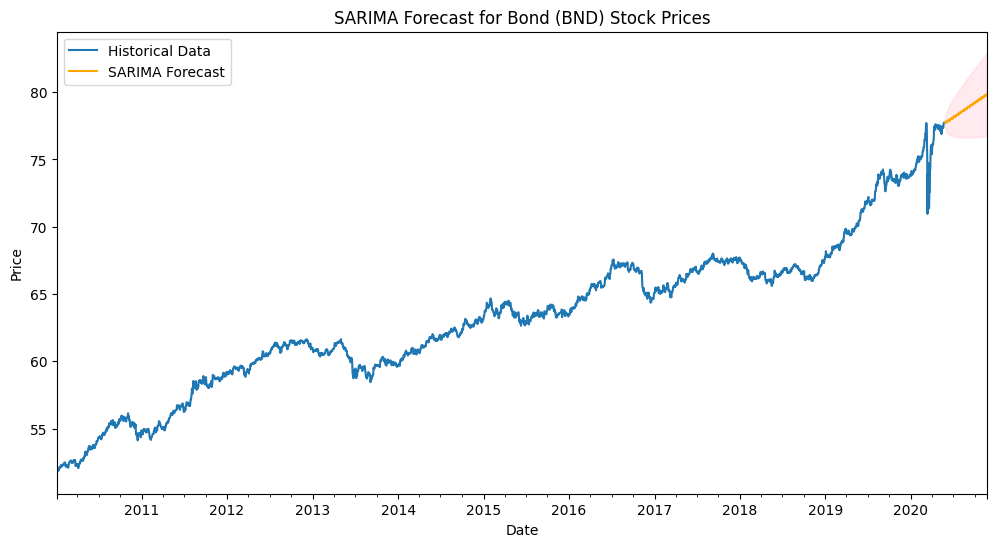

Trend Analysis:
The trend over the forecast period is upward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0381
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.6774e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.5912e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.4236e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.6689e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.6300e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.6437e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.9149e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.3551e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.3801e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

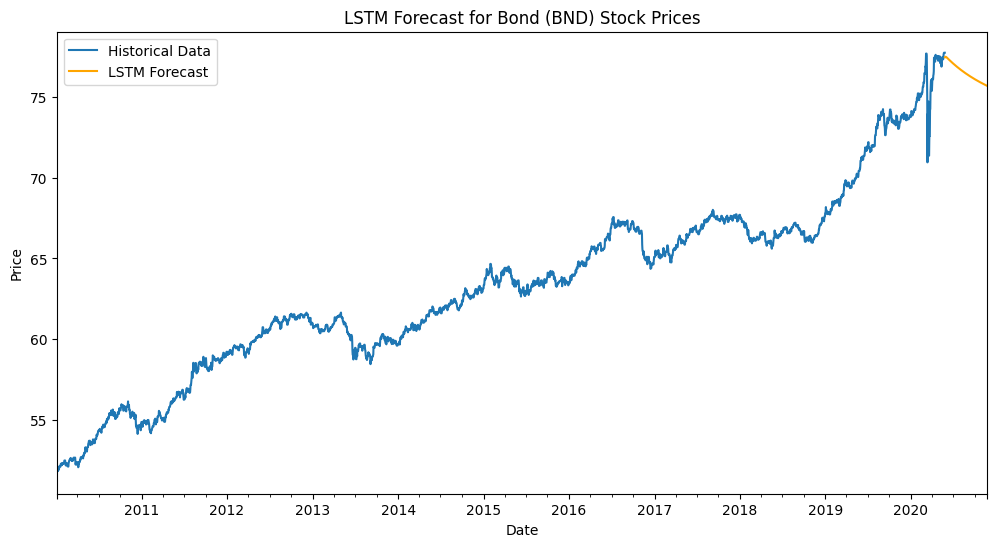

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


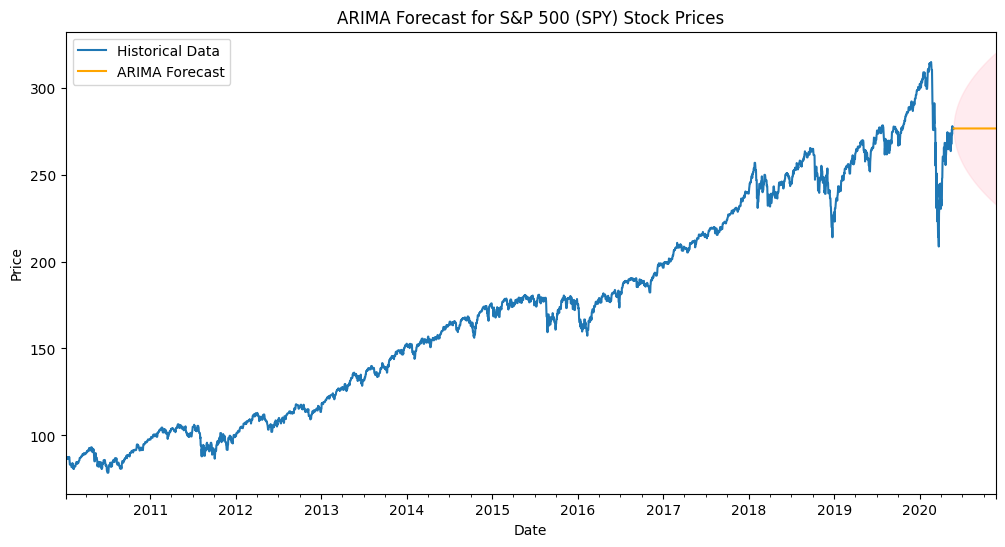

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"


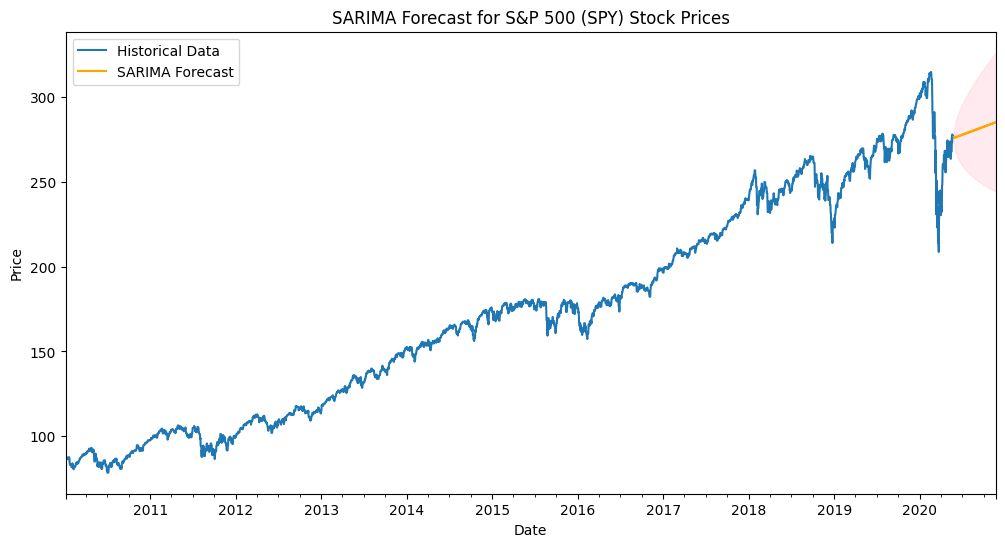

Trend Analysis:
The trend over the forecast period is upward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0683
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 3.5079e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 3.0792e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.6791e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 2.9964e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.7458e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.9072e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.4213e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.2746e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 2.2363e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

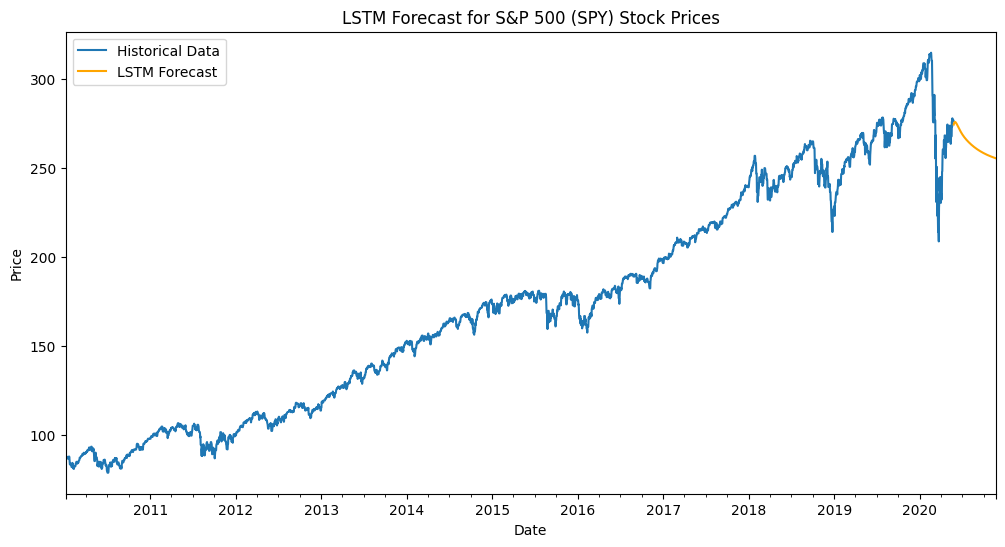

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.
LSTM Forecast for TSLA completed.
LSTM Forecast for BND completed.
LSTM Forecast for SPY completed.
Forecast DataFrame:
                                 TSLA        BND         SPY
2020-05-26 00:00:00+00:00  54.813583  77.471474  274.357178
2020-05-27 00:00:00+00:00  54.873940  77.490227  274.972778
2020-05-28 00:00:00+00:00  54.948387  77.497406  275.391602
2020-05-29 00:00:00+00:00  55.028149  77.496887  275.651917
2020-05-30 00:00:00+00:00  55.109524  77.491333  275.788452


<Figure size 1000x600 with 0 Axes>

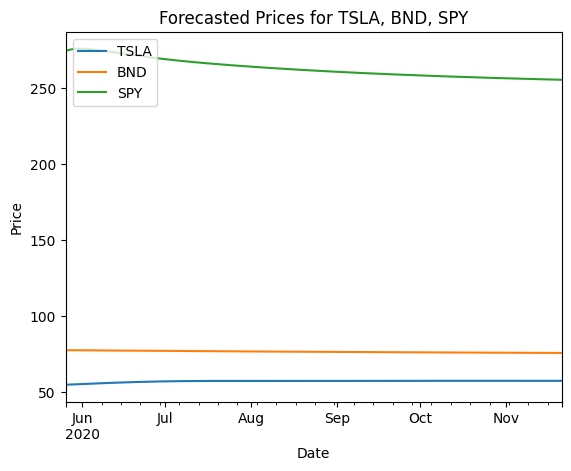

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from financial_analysis import forecast_and_analyze  # Import your forecast function here

# Load and Prepare Data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
bnd_data = data['BND']
spy_data = data['SPY']

# Convert to datetime and set frequency to daily
tsla_data.index = pd.to_datetime(tsla_data.index)
bnd_data.index = pd.to_datetime(bnd_data.index)
spy_data.index = pd.to_datetime(spy_data.index)
tsla_data = tsla_data.asfreq('D').fillna(method='ffill')  # forward fill
bnd_data = bnd_data.asfreq('D').fillna(method='ffill')
spy_data = spy_data.asfreq('D').fillna(method='ffill')

# Split Data (80% Train, 20% Test)
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data[:train_size]
test_data = tsla_data[train_size:]
train_data_bnd = bnd_data[:train_size]
test_data_bnd = bnd_data[train_size:]
train_data_spy = spy_data[:train_size]
test_data_spy = spy_data[train_size:]

# Forecast Period
forecast_period = 180

# Define a helper function to extract forecast
def extract_forecast(forecast_result, model_name, asset_name):
    if forecast_result is not None:
        print(f"{model_name} Forecast for {asset_name} completed.")
        return forecast_result['forecast']
    else:
        print(f"{model_name} Forecast for {asset_name} could not be generated.")
        return pd.Series([None] * forecast_period, index=pd.date_range(start=train_data.index[-1], periods=forecast_period, freq='D'))

# Generate Forecasts for each model and asset
arima_tsla = forecast_and_analyze(train_data, model_type="arima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
sarima_tsla = forecast_and_analyze(train_data, model_type="sarima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
lstm_tsla = forecast_and_analyze(train_data, model_type="lstm", forecast_period=forecast_period, asset_name="Tesla (TSLA)")

arima_bnd = forecast_and_analyze(train_data_bnd, model_type="arima", forecast_period=forecast_period, asset_name="Bond (BND)")
sarima_bnd = forecast_and_analyze(train_data_bnd, model_type="sarima", forecast_period=forecast_period, asset_name="Bond (BND)")
lstm_bnd = forecast_and_analyze(train_data_bnd, model_type="lstm", forecast_period=forecast_period, asset_name="Bond (BND)")

arima_spy = forecast_and_analyze(train_data_spy, model_type="arima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
sarima_spy = forecast_and_analyze(train_data_spy, model_type="sarima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
lstm_spy = forecast_and_analyze(train_data_spy, model_type="lstm", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")

# Collect forecasts for portfolio optimization (choose the preferred model, e.g., LSTM)
forecast_df = pd.DataFrame({
    'TSLA': extract_forecast(lstm_tsla, "LSTM", "TSLA"),
    'BND': extract_forecast(lstm_bnd, "LSTM", "BND"),
    'SPY': extract_forecast(lstm_spy, "LSTM", "SPY")
})

# Convert 'None' to NaN for numeric compatibility and drop any all-NaN columns
forecast_df = forecast_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Print DataFrame for verification
print("Forecast DataFrame:\n", forecast_df.head())

# Plot the forecasted data (if data exists)
if not forecast_df.empty:
    plt.figure(figsize=(10, 6))
    forecast_df.plot()
    plt.title('Forecasted Prices for TSLA, BND, SPY')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.show()
else:
    print("No valid forecast data to plot.")

